In [ ]:
#For general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#For data preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
#For model creation and training
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#For model evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
file_train = '/content/SMS_train.csv'
file_test = '/content/SMS_test.csv'

df_train = pd.read_csv(file_train, encoding = 'cp1252')
df_test = pd.read_csv(file_test, encoding = 'cp1252')

In [ ]:
print(df_train.head())
print(df_train.shape)

   S. No.                                       Message_body     Label
0       1                         Rofl. Its true to its name  Non-Spam
1       2  The guy did some bitching but I acted like i'd...  Non-Spam
2       3  Pity, * was in mood for that. So...any other s...  Non-Spam
3       4               Will ü b going to esplanade fr home?  Non-Spam
4       5  This is the 2nd time we have tried 2 contact u...      Spam
(957, 3)


In [ ]:
print(df_train.head())
print(df_train.shape)

   S. No.                                       Message_body     Label
0       1                         Rofl. Its true to its name  Non-Spam
1       2  The guy did some bitching but I acted like i'd...  Non-Spam
2       3  Pity, * was in mood for that. So...any other s...  Non-Spam
3       4               Will ü b going to esplanade fr home?  Non-Spam
4       5  This is the 2nd time we have tried 2 contact u...      Spam
(957, 3)


In [ ]:
df_train['y'] = pd.Categorical(df_train['Label']).codes
print(df_train.head())
print(df_train.shape)

   S. No.                                       Message_body     Label  y
0       1                         Rofl. Its true to its name  Non-Spam  0
1       2  The guy did some bitching but I acted like i'd...  Non-Spam  0
2       3  Pity, * was in mood for that. So...any other s...  Non-Spam  0
3       4               Will ü b going to esplanade fr home?  Non-Spam  0
4       5  This is the 2nd time we have tried 2 contact u...      Spam  1
(957, 4)


In [ ]:
df_test['y'] = pd.Categorical(df_test['Label']).codes
print(df_test.head())
print(df_test.shape)

   S. No.                                       Message_body Label  y
0       1  UpgrdCentre Orange customer, you may now claim...  Spam  1
1       2  Loan for any purpose £500 - £75,000. Homeowner...  Spam  1
2       3  Congrats! Nokia 3650 video camera phone is you...  Spam  1
3       4  URGENT! Your Mobile number has been awarded wi...  Spam  1
4       5  Someone has contacted our dating service and e...  Spam  1
(125, 4)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        125 non-null    int64 
 1   Message_body  125 non-null    object
 2   Label         125 non-null    object
 3   y             125 non-null    int8  
dtypes: int64(1), int8(1), object(2)
memory usage: 3.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


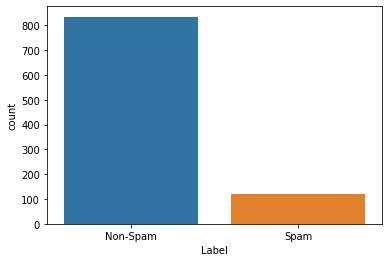

In [ ]:
sns.countplot(df_train['Label'])

In [ ]:
df = pd.concat([df_train,df_test], ignore_index=False, axis=0)

In [ ]:
df.shape
df.shape

(1082, 4)

In [ ]:
y = df['y'].values

In [ ]:
y.shape

(1082,)

In [ ]:
vectorizer = CountVectorizer()
spamham_countVector = vectorizer.fit_transform(df['Message_body'])

In [ ]:
spamham_countVector.shape

(1082, 3527)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spamham_countVector, y, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(865, 3527)
(865,)
(217, 3527)
(217,)


In [ ]:
# Train the model using naive bias
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

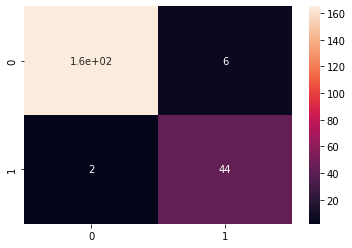

In [ ]:
# Evaluate the model
y_pred = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       171
           1       0.88      0.96      0.92        46

    accuracy                           0.96       217
   macro avg       0.93      0.96      0.95       217
weighted avg       0.97      0.96      0.96       217

